In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 불필요한 변수 제거

In [91]:
train = train.drop(columns=["index", "FLAG_MOBIL"])

test = test.drop(columns=['index', 'FLAG_MOBIL'])

KeyError: "['index', 'FLAG_MOBIL'] not found in axis"

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

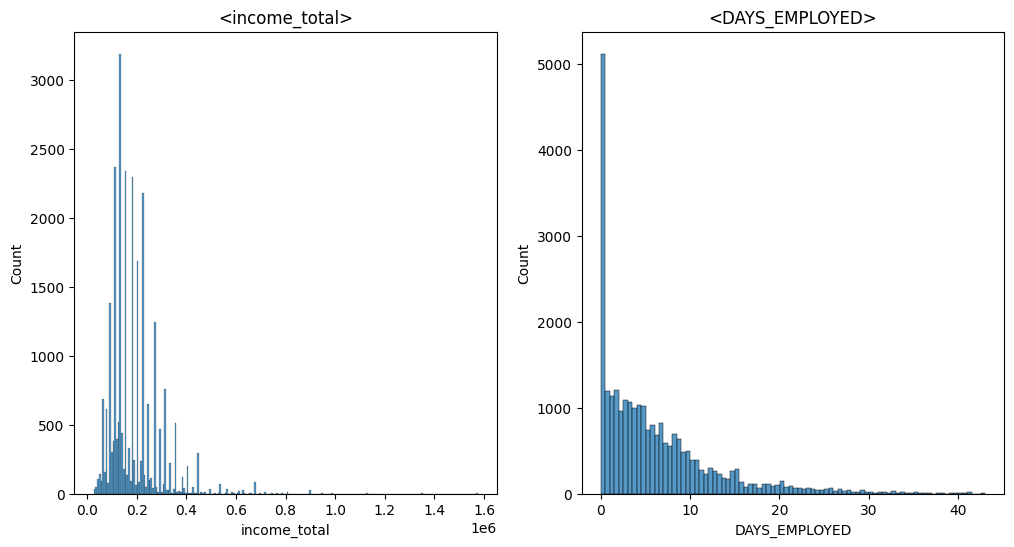

In [14]:
fig, axes = plt.subplots(1,2, figsize = (12,6))
axes = axes.flatten()
columns = ['income_total', 'DAYS_EMPLOYED']

for i, col in enumerate(columns):
    sns.histplot(data=train, x=col, ax=axes[i])
    axes[i].set_title(f"<{col}>")
plt.show()    

왜도 : 분포의 대칭성을 나나내는 척도
첨도 : 확률 분포의 꼬리의 두꺼운 정도 (첨도 클수록 두꺼움)

In [26]:
from scipy.stats import skew, kurtosis

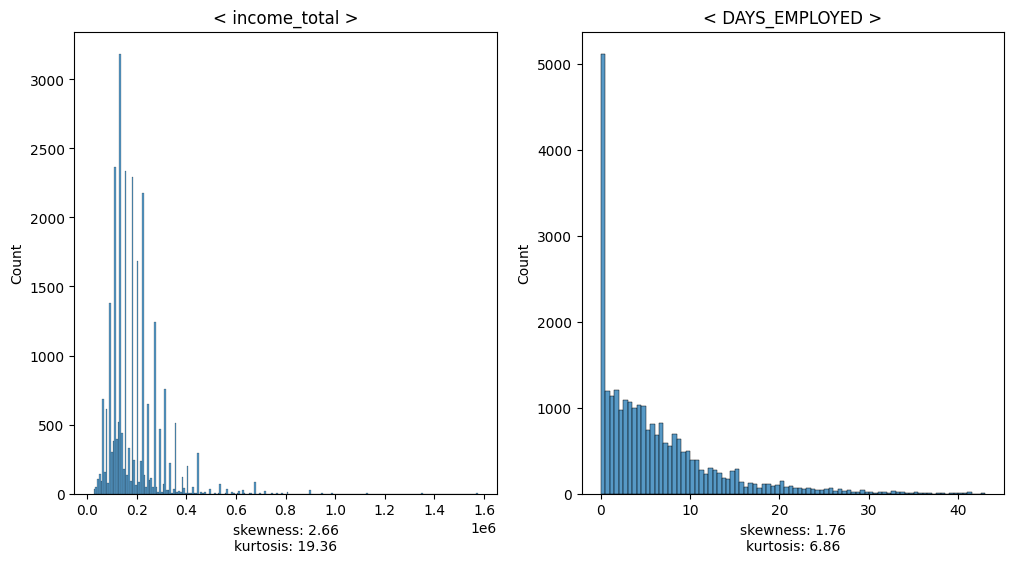

In [28]:
# income_total, DAYS_EMPLOYED 변수의 히스토그램 그린다

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
columns = ["income_total", "DAYS_EMPLOYED"]

for i, col in enumerate(columns):
  sns.histplot(data=train, x=col, ax=axes[i])
  axes[i].set_title(f"< {col} >")

  skewness = skew(train[col])
  kurto = kurtosis(train[col], fisher=False)
  axes[i].set_xlabel(f"skewness: {round(skewness, 2)}\nkurtosis: {round(kurto, 2)}")
plt.show()

test 데이터도 확인

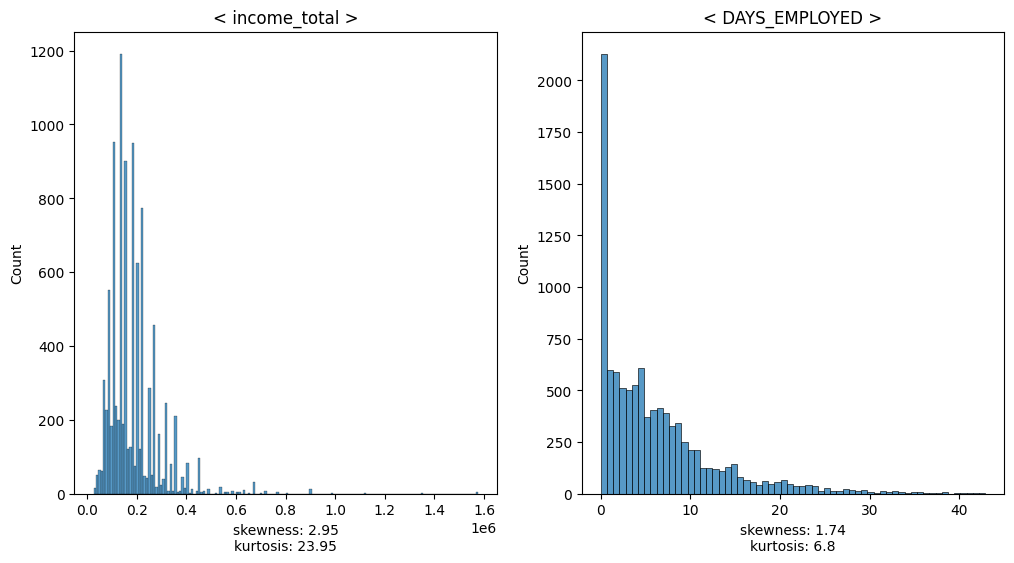

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
columns = ["income_total", "DAYS_EMPLOYED"]

for i, col in enumerate(columns):
  sns.histplot(data=test, x=col, ax=axes[i])
  axes[i].set_title(f"< {col} >")

  skewness = skew(test[col])
  kurto = kurtosis(test[col], fisher=False)
  axes[i].set_xlabel(f"skewness: {round(skewness, 2)}\nkurtosis: {round(kurto, 2)}")
plt.show()

# 로그 변환을 통해 그래프 정규화

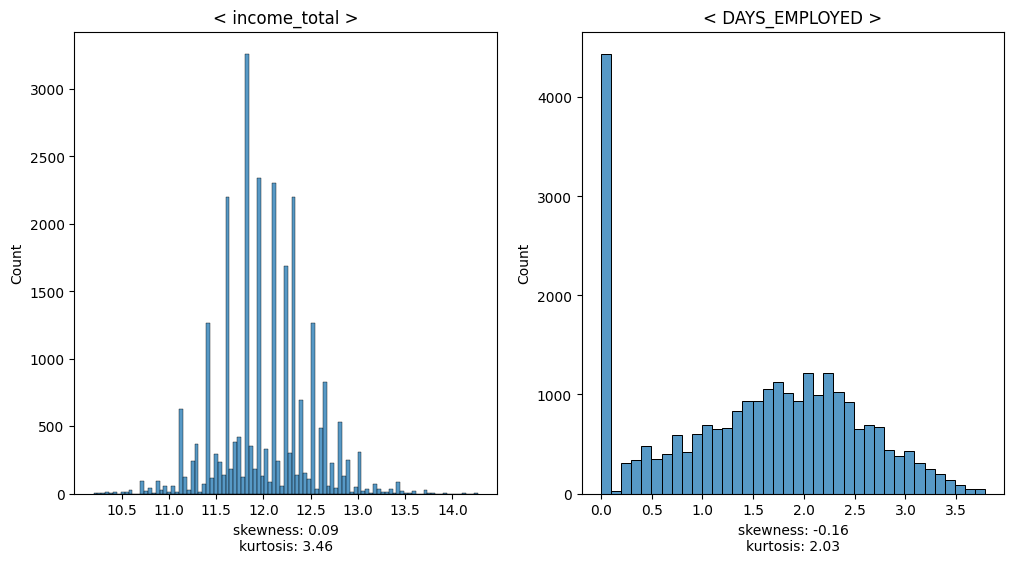

In [31]:
# income_total, DAYS_EMPLOYED 변수의 히스토그램 그린다

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
columns = ["income_total", "DAYS_EMPLOYED"]

for i, col in enumerate(columns):
  if i == 1:
    data = np.log(train[col] + 1)
  else:
    data = np.log(train[col])
  sns.histplot(data=data, ax=axes[i])
  axes[i].set_title(f"< {col} >")

  skewness = skew(data)
  kurto = kurtosis(data, fisher=False)
  axes[i].set_xlabel(f"skewness: {round(skewness, 2)}\nkurtosis: {round(kurto, 2)}")
plt.show()

0인 데이터에는 로그 변환을 적용할 수 없기 때문에 DAYS_EMPLOYED 변수는 1을 임의로 더하겠습니다

In [34]:
train["income_total"] = np.log(train["income_total"])
train["DAYS_EMPLOYED"] = np.log(train["DAYS_EMPLOYED"] + 1)

test["income_total"] = np.log(test["income_total"])
test["DAYS_EMPLOYED"] = np.log(test["DAYS_EMPLOYED"] + 1)

# 이상치 데이터 (범주형 변수 추가)

일반적으로 이상치 데이터가 존재한다면, 가장 많이 하는 처리 방법은 제거입니다
그러나 child_num이 5 초과인 변수에서 뚜렷한 패턴이 존재했기 때문에 카테고리형 변수를 추가로 만들어주도록 하겠습니다

새로운 변수 child_num_over_five 자식 수 에 따라 True, False

In [35]:
train["child_num_over_five"] = train["child_num"] > 5
test["child_num_over_five"] = test["child_num"] > 5

# 중복된 행 처리

In [36]:
# 중복된 행을 확인
train.drop(columns="begin_month").duplicated().sum()

np.int64(14358)

In [37]:
test.drop(columns="begin_month").duplicated().sum()

np.int64(4415)

train 데이터 중복된 행의 개수가 너무 많아서 제거한다면 데이터의 크기가 크게 줄어들 것 따라서 모델이 충분히 패턴을 학습하지 못하게 만들 수 있습니다 
그래서 제거하지않고 신용카드를 여러번 발급받는 사람들에게서 패턴을 학습할 수 있도록 새로운 변수를 추가

In [39]:
# 신용카드 중복 발급 수를 나타내는 duplicated_num 변수를 추가합니다

train_drop = train.drop(columns="begin_month")
duplicated_num = train_drop.groupby(train_drop.columns.tolist(), as_index=False).transform('size')
train["duplicated_num"] = duplicated_num

In [40]:
test_drop = test.drop(columns="begin_month")
duplicated_num = test_drop.groupby(test_drop.columns.tolist(), as_index=False).transform('size')
test["duplicated_num"] = duplicated_num

# 파생변수 만들기 

기존의 변수들을 이용하여 새로운 변수를 만드는 것을 의미

In [41]:
train['before_employed'] =  train['DAYS_BIRTH']-  train['DAYS_EMPLOYED']
test["before_employed"] = test['DAYS_BIRTH']-  test['DAYS_EMPLOYED']

In [43]:
from tabulate import tabulate

output_table = []

types = train["house_type"].value_counts().index

dfs = [train[train["house_type"] == types[i]] for i in range(len(types))]

for i, df in enumerate(dfs):
  output_table.append([types[i],
                      f'{round((len(df) / len(train)) * 100, 2)}%',
                      round(df["credit"].value_counts(normalize=True) * 100, 2).astype("str") + "%"])

print(tabulate(output_table, headers=['House Type', 'Proportion', 'Credit Distribution'], tablefmt='grid'))

+---------------------+--------------+---------------------------------+
| House Type          | Proportion   | Credit Distribution             |
+=====================+==============+=================================+
| House / apartment   | 89.4%        | credit                          |
|                     |              | 2.0    64.31%                   |
|                     |              | 1.0    23.54%                   |
|                     |              | 0.0    12.15%                   |
|                     |              | Name: proportion, dtype: object |
+---------------------+--------------+---------------------------------+
| With parents        | 4.75%        | credit                          |
|                     |              | 2.0    63.09%                   |
|                     |              | 1.0     24.9%                   |
|                     |              | 0.0    12.01%                   |
|                     |              | Name: propor

In [44]:
train["house_owner"] = (train["house_type"] != "Rented apratment")
test["house_owner"] = (test["house_type"] != "Rented apratment")

# 카테고리형 변수 변환

one-hot encoding : 일반적인 카테고리형 변수 변환 방법으로, 각 변수들을 새로운 이진 변소루 바꿔줌

label encoding : 카테고리 값들을 0부터 n-1까지 정수로 매핑하는 방법

In [52]:
from sklearn.preprocessing import LabelEncoder

cols = train.select_dtypes(include=['object'])
le = LabelEncoder()

for col in cols:
    train[col] = le.fit_transform(train[col])

In [53]:
train.to_csv('../../data/데이콘_신용카드/stage4_creditcard_train.csv')
test.to_csv('../../data/데이콘_신용카드/stage4_creditcard_test.csv')
submission.to_csv('../../data/데이콘_신용카드/stage4_creditcard_submission.csv')

# 하이퍼파라미터 튜닝 & 최종 모델링

의사결정나무
랜덤포레스트
XGBoost
LightGBM

앙상블 모델
보팅 : 서로 다른 알고리즘을 가진 분류기 중 투표를 통하여 최종 예측결과를 결정
배깅 : 부트스트랩모델을 여러 번 독립적으로 학습시켜 각 모델 예측을 평균하여 최종 예측 만듦 
부스팅 : 가중치를 활용하여 약한 분류기를 강한 분류기로 만드는 방법

의사결정나무

In [54]:
train = train.to_csv('../../data/데이콘_신용카드/stage4_creditcard_train.csv')
test = test.to_csv('../../data/데이콘_신용카드/stage4_creditcard_test.csv')
submission = submission.to_csv('../../data/데이콘_신용카드/stage4_creditcard_submission.csv')

In [64]:
print(train['credit'].value_counts())

credit
2.0    16968
1.0     6267
0.0     3222
Name: count, dtype: int64


train 데이터 기반으로 학습데이터와 검증데이터 비율을 8:2로 분리 train validation으로 분리합니다

이때 stratify = y 를 통해 데이티가 타깃 클래스의 비율을 반영하도록 설정

In [66]:
X = train.drop(columns='credit')
y = train['credit']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y,
                                                      test_size= 0.2, random_state=42)

#사이킷런의 DecisionTreeClassifier로 모델 학습
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

average : 다중 클래스 분류에서 사용되는 평균 방법을 지정하는 매개변수
<average 옵션>
none : 클래스별로 평가 지표를 계산하고 개별 클래스마다 값을 반환합니다. 이 경우 클래스마다 리콜, 정밀도, F1 스코어 등을 계산한 값을 반환함

micro : 모든 클래스의 TP, FP, FN을 모두 더하여 전체 데이터에 대한 평가 지표를 계산합니다. 전체 데이터에 대한 하나의 평가 지표 값을 얻을 수 있음

macro : 각 클래스마다 평가 지표를 계산한 뒤 이들 값을 평균하여 전체 평가 지표 값을 계산합니다. 클래스의 개수에 상관없이 각 클래스의 영향력을 동일하게 취급

weighted : 각 클래스마다 평가 지표를 계산한 뒤, 클래스의 샘플 수를 고려하여 가중 평균을 계산하여 전체 평가 지표 값을 계산

samples : 다중 레이블 분류에서 사용되며, 각 샘플에 대해 평가 지표를 계산한 뒤 이들 값을 평균하여 전체 평가 지표 값을 계산

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, log_loss

pred_1 = dt.predict(X_valid)
valid_cm_1 = confusion_matrix(y_valid, pred_1)
valid_acc_1 = accuracy_score(y_valid, pred_1)
valid_recall_1 = recall_score(y_valid, pred_1, average="weighted")
valid_precision_1 = precision_score(y_valid, pred_1, average="weighted")
valid_f1_1 = f1_score(y_valid, pred_1, average="weighted")

print("Confusion Matrix(혼동행렬): \n",valid_cm_1)
print('\n')
print("Accuracy(정확도): ", round(valid_acc_1*100, 2))
print("Recall(재현율): ", round(valid_recall_1*100, 2))
print("Precision(정밀도): ", round(valid_precision_1*100, 2))
print("F1 Score(정밀도, 리콜의 조화평균): ", round(valid_f1_1, 4))

Confusion Matrix(혼동행렬): 
 [[ 291  147  206]
 [ 135  796  323]
 [ 217  374 2803]]


Accuracy(정확도):  73.51
Recall(재현율):  73.51
Precision(정밀도):  73.78
F1 Score(정밀도, 리콜의 조화평균):  0.7363


In [69]:
from sklearn.metrics import classification_report

# y_valid는 실제 레이블을, pred_1은 모델의 예측 결과
report = classification_report(y_valid, pred_1)
print(report)

              precision    recall  f1-score   support

         0.0       0.45      0.45      0.45       644
         1.0       0.60      0.63      0.62      1254
         2.0       0.84      0.83      0.83      3394

    accuracy                           0.74      5292
   macro avg       0.63      0.64      0.63      5292
weighted avg       0.74      0.74      0.74      5292



In [70]:
feature_importances = pd.Series(dt.feature_importances_,index=X_valid.columns).sort_values(ascending=False)
feature_importance = feature_importances.head(20)
print(feature_importance)

begin_month        0.175048
DAYS_EMPLOYED      0.122615
income_total       0.103818
Unnamed: 0         0.103253
before_employed    0.092795
DAYS_BIRTH         0.092265
occyp_type         0.055384
duplicated_num     0.051277
family_type        0.031088
edu_type           0.020905
family_size        0.018891
income_type        0.018615
phone              0.017904
child_num          0.016787
house_type         0.016697
car                0.015896
reality            0.014692
gender             0.013038
work_phone         0.011136
email              0.007895
dtype: float64


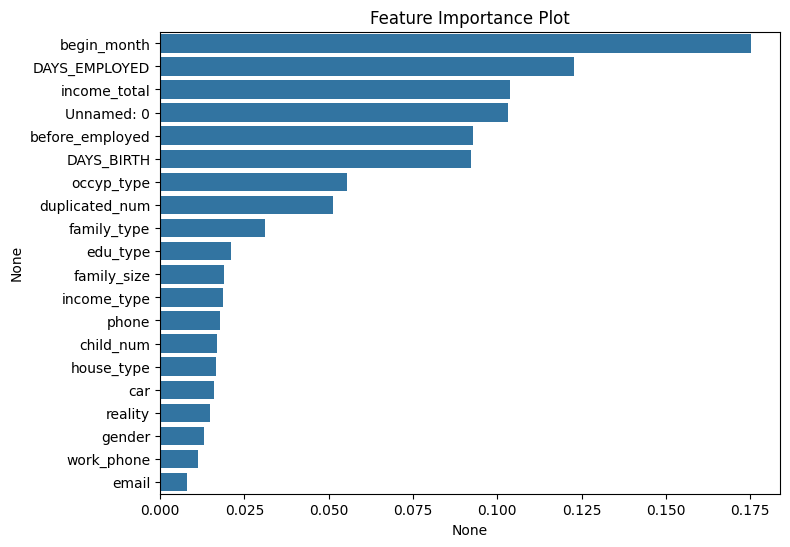

In [71]:
# feature_imortances 를 시각화
%matplotlib inline

plt.figure(figsize=(8,6))
plt.title('Feature Importance Plot')
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.show()


log_loss 로그 손실로 0에 가까울수록 좋은 지표

In [72]:
prob_1 = dt.predict_proba(X_valid)

log_loss_1 = log_loss(y_valid, prob_1)
print("Log loss(로그 손실): ", round(log_loss_1, 4))

Log loss(로그 손실):  9.549


# 왜 로그 손실이 9.549가 나올까..? 
8.3661이 나와야 하는데 ..

# 랜덤 포레스트

과적합 줄임 : 부트스트랩 샘플링과 랜덤 특성 선택을 통해 모델의 과적합을 줄이는 효과
앙상블 효과 : 여러 개의 의사결정 트리를 조합하여 강력하고 안정적인 예측을 제공
특성 중요도 평가 : 각 트리에서 변수의 중요도를 평가하여 특성의 영향력을 평가
다양한 데이터 타입 처리 : 범주형 변수와 연속형 변수를 함께 다룰 수 있다

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

# 모델 학습 및 예측
rf.fit(X_train, y_train)
pred_2 = rf.predict(X_valid)

# 정확도 평가
accuracy = accuracy_score(y_valid, pred_2)
print(f'RandomForestClassifier 정확도: {accuracy:.4f}')

# 오차 행렬
cm2 = confusion_matrix(y_valid, pred_2)
print(cm2)

RandomForestClassifier 정확도: 0.7940
[[ 201   93  350]
 [  20  719  515]
 [  28   84 3282]]


In [74]:
pred_2 = rf.predict(X_valid)
valid_cm_2 = confusion_matrix(y_valid,pred_2)
valid_acc_2 = accuracy_score(y_valid,pred_2)
valid_recall_2 = recall_score(y_valid,pred_2, average='weighted')
valid_precision_2 = precision_score(y_valid,pred_1, average='weighted')
valid_f1_2 = f1_score(y_valid,pred_2, average='weighted')

print("Confusion Matrix(혼동행렬): \n",valid_cm_2)
print('\n')
print("Accuracy(정확도): ", round(valid_acc_2*100, 2))
print("Recall(재현율): ", round(valid_recall_2*100, 2))
print("Precision(정밀도): ", round(valid_precision_2*100, 2))
print("F1 Score(정밀도,리콜의 조화평균): ", round(valid_f1_2, 4))

Confusion Matrix(혼동행렬): 
 [[ 201   93  350]
 [  20  719  515]
 [  28   84 3282]]


Accuracy(정확도):  79.4
Recall(재현율):  79.4
Precision(정밀도):  73.78
F1 Score(정밀도,리콜의 조화평균):  0.7715


In [75]:
# 변수 중요도 계산

importances_values = pd.Series(rf.feature_importances_, index=X_valid.columns).sort_values(ascending=False)
fr_top20 = importances_values.head(20)
fr_top20

begin_month        0.177904
Unnamed: 0         0.108827
before_employed    0.102697
DAYS_BIRTH         0.102339
DAYS_EMPLOYED      0.087542
income_total       0.084205
duplicated_num     0.081056
occyp_type         0.051598
family_type        0.024123
family_size        0.021802
income_type        0.020941
edu_type           0.019352
car                0.017348
phone              0.016645
reality            0.016249
child_num          0.016036
gender             0.014990
house_type         0.014201
work_phone         0.013160
email              0.008963
dtype: float64

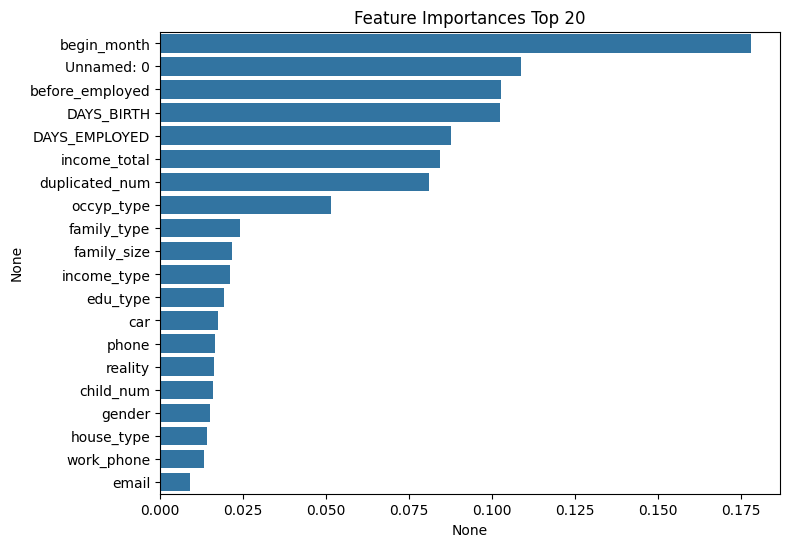

In [76]:
# 변수 중요도 시각화

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=fr_top20, y=fr_top20.index)
plt.show()

In [77]:
# log_loss로 예측
y_prob = rf.predict_proba(X_valid)
log_loss_2 = log_loss(y_valid, y_prob)
print("Log Loss: ", round(log_loss_2, 4))

Log Loss:  0.5451


# XGBoost
그래디언트 부스팅알고리즘을 분산환경에서도 실행할 수 있도록 구현해놓은 머신러닝 라이브러리 

그래디언트 부스팅 : 기울기를 줄여가며 결과적으로 잔차를 줄여나가는 학습 방식

In [78]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 4.2/124.9 MB 22.9 MB/s eta 0:00:06
   - -------------------------------------- 5.2/124.9 MB 18.7 MB/s eta 0:00:07
   - -------------------------------------- 5.5/124.9 MB 8.4 MB/s eta 0:00:15
   --- ------------------------------------ 10.2/124.9 MB 11.6 MB/s eta 0:00:10
   ---- ----------------------------------- 14.7/124.9 MB 14.0 MB/s eta 0:00:08
   ---- ----------------------------------- 14.7/124.9 MB 14.0 MB/s eta 0:00:08
   ------- -------------------------------- 22.8/124.9 MB 13.7 MB/s eta 0:00:08
   --------- ------------------------------ 29.1/124.9 MB 15.4 MB/s eta 0:00:07
   ---------- ----------------------------- 33.8/124.9 MB 16.0 MB/s eta 0:00:06
   ------------ --------------------------- 38.5/124.9 MB 16.5 MB/s eta 0:00:06
   ------------- -------------------------- 41.4/124.9 MB 16.2 MB/s eta 0:00:06
   -------------- ------------------------- 44.6/124.

In [79]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

# 모델 학습 및 예측
xgb.fit(X_train, y_train)
pred_3 = xgb.predict(X_valid)

# 정확도 평가
accuracy = accuracy_score(y_valid, pred_3)
print(f'XGBoost 정확도: {accuracy:.4f}')

# 오차 행렬
cm3 = confusion_matrix(y_valid, pred_3)
print(cm3)

XGBoost 정확도: 0.7186
[[  75   83  486]
 [  12  431  811]
 [  31   66 3297]]


In [80]:
pred_3 = xgb.predict(X_valid)
valid_cm_3 = confusion_matrix(y_valid, pred_3)
valid_acc_3 = accuracy_score(y_valid, pred_3)
valid_recall_3 = recall_score(y_valid, pred_3, average='weighted')
valid_precision_3 = precision_score(y_valid, pred_3, average='weighted')
valid_f1_3 = f1_score(y_valid, pred_3, average='weighted')

print("Confusion Matrix(혼동행렬): \n",valid_cm_3)
print("\n")
print("Accuracy(정확도): ", round(valid_acc_3*100, 2))
print("Recall(재현율): ", round(valid_recall_3*100, 2))
print("Precision(정밀도): ", round(valid_precision_3*100, 2))
print("F1 Score(정밀도,재현율의 조화평균): ", round(valid_f1_3, 4))

Confusion Matrix(혼동행렬): 
 [[  75   83  486]
 [  12  431  811]
 [  31   66 3297]]


Accuracy(정확도):  71.86
Recall(재현율):  71.86
Precision(정밀도):  71.37
F1 Score(정밀도,재현율의 조화평균):  0.6648


In [81]:
# 변수 중요도 

xgb_importances_values = xgb.feature_importances_
xgb_importances_values

array([0.02940929, 0.04216824, 0.04269006, 0.03882579, 0.04238175,
       0.04514887, 0.03865223, 0.04044059, 0.04737963, 0.04527833,
       0.04907252, 0.04855718, 0.05595136, 0.05330805, 0.03908928,
       0.0426261 , 0.04549971, 0.14015816, 0.        , 0.0688557 ,
       0.04450717, 0.        ], dtype=float32)

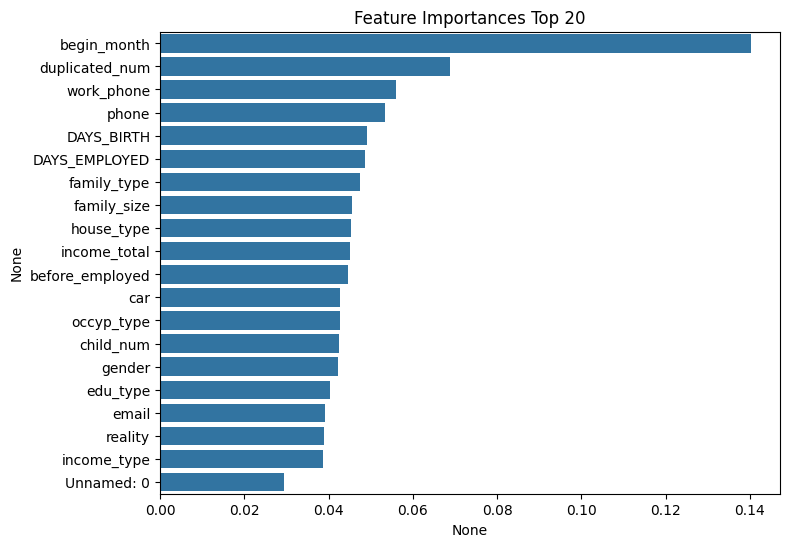

In [82]:
# 변수 중요도 시각화

xgb_importances = pd.Series(xgb_importances_values, index=X_valid.columns).sort_values(ascending=False)
xgb_top20 = xgb_importances.head(20)

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=xgb_top20, y=xgb_top20.index)
plt.show()

In [83]:
# log_loss 계산 
y_prob = xgb.predict_proba(X_valid)
log_loss_3 = log_loss(y_valid, y_prob)
print("Log Loss: ", round(log_loss_3, 4))

Log Loss:  0.6753


# lightGBM

다른 알고리즘과 다르게 Leaf-wise 분할을 한다
트리의 균형을 맞추지 않고 최대 손실 값을 갖는 리프 노드를 지속적으로 분할하면서 깊고 비대칭적인 트리를 생성하고, 기존의 트리 기준 분할 방식에 비해 예측 오류 손실을 최소화하여 예측 성능을 높인다

단 데이터가 적을 경우 과적합의 위험이 있다

In [84]:
!pip install lightgbm 

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 8.4 MB/s eta 0:00:00


In [85]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)

# 모델 학습 및 예측
lgbm.fit(X_train, Y_train)
pred_4 = lgbm.predict(X_valid)

# 정확도 평가
accuracy = accuracy_score(y_valid, pred_4)
print(f'LGBM 정확도: {accuracy:.4f}')

# 오차 행렬
cm4 = confusion_matrix(y_valid, pred_4)
print(cm4)

LightGBMError: Do not support special JSON characters in feature name.

왤까

In [86]:
print(f"Base model: {round(log_loss_2, 4)}")
print(f"Grid Search: {round(log_loss_grid, 4)}")

Base model: 0.5451


NameError: name 'log_loss_grid' is not defined

모델 성능 비교

In [88]:
print(f'의사결정나무\t{round(valid_f1_1, 4)}')
print(f'랜덤포레스트\t{round(valid_f1_2, 4)}')
print(f'XGBoost\t\t{round(valid_f1_3, 4)}')
# print(f'LightGBM\t{round(valid_f1_4, 4)}')

의사결정나무	0.7363
랜덤포레스트	0.7715
XGBoost		0.6648


랜덤포레스트가 가장 높다! 